# Number of public schools in each PPG neighborhood graph dataset

code to cluster all zipcodes - find out which has the most public schools

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("https://data.wprdc.org/dataset/46fb3ca4-e844-4b42-b034-e87291d34699/resource/06664b02-c673-49d5-8a70-d3cd1c18ac8d/download/pps_schoolsapr2019publish.csv")

df['zip'].value_counts().sort_values(ascending=False)

15212    15
15206    10
15210     9
15226     7
15217     6
15219     6
15216     6
15208     6
15233     5
15201     5
15207     4
15213     4
15204     3
15205     3
15220     2
15214     2
15222     2
15203     2
15224     2
15221     1
15232     1
15211     1
Name: zip, dtype: int64

Using https://apps.pittsburghpa.gov/finance/2014-zip-codes.pdf able to correspond zip codes to neighborhoods (only doing top most schools in zip codes that are part of city of Pittsburgh)
* 15206 - East Liberty (15 schools)
* 15217 - Squirrel Hill (7)
* 15219 - Uptown Schenley Heights (6)
* 15208 - Homewood (6)
* 15233 - Northside (5)
* 15201 - Lawrenceville (5)

make bar graph for better visual representation

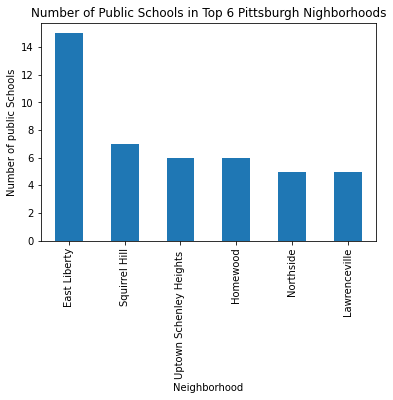

In [168]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# make quick data set
data = pd.Series([15,7,6,6,5,5], index=["East Liberty", "Squirrel Hill", "Uptown Schenley Heights ", "Homewood", "Northside", "Lawrenceville"])

# plot histogram
graph = data.plot.bar()

#name x and y axis
graph.set_xlabel("Neighborhood")
graph.set_ylabel("Number of public Schools")
plt.title('Number of Public Schools in Top 6 Pittsburgh Nighborhoods')
plt.show()

# Enrollment by school and neighborhood dataset

get all neigborhoods and add all of enrolled students in each neighborhood

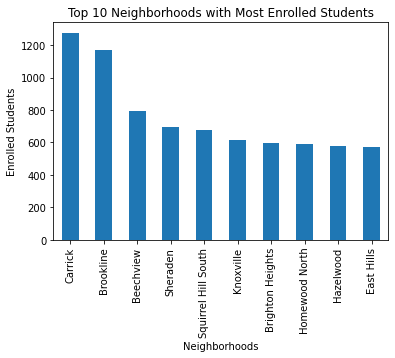

In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load file
df = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")

# group by neighborhood and sum up enrolled students per neighborhood
enrolled_stu = df.groupby('neighborhood')['enrolled_students'].sum()

# sort by most in decending 
sort_enrolled = enrolled_stu.sort_values(ascending=False)

new_df = sort_enrolled.head(10)

new_df.plot(kind='bar', title='Top 10 Neighborhoods with Most Enrolled Students', xlabel='Neighborhoods', ylabel='Enrolled Students')
plt.show()


# Cities of Pittsburgh Housing Tenures

Affordability submetric was hard due to lack of data sets that focused on Pittsburgh neighborhoods and the housing market. Had to improvise. The idea is the neighborhood with the most housing tenures, meaning people who own homes, indicates that the affordability is adequte for a family who is looking to buy a home in a nice area with great schooling. 

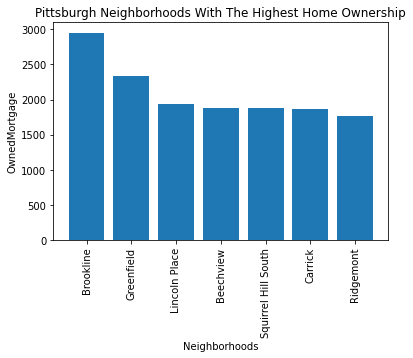

In [167]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# load census tracks neighborhoods file 
df1 = pd.read_csv("https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/6b09ea3e-7d34-4665-ad0b-798a0efadc29/download/index_pittsburghneighborhoods_blocks_2020.csv")

# group by tract and neighborhood
grouped = df1.groupby(['TRACT'])['Neighborhood'].apply(lambda x: ', '.join(x)).reset_index()

# remove trailing zeros from tracts and convert back to string 
grouped['TRACT'] = grouped['TRACT'].astype(str).apply(lambda x: x[:-2])

# load housing tenure
df2 = pd.read_csv("https://data.wprdc.org/dataset/63d09e2c-931c-4c66-86e0-844b84d2a8ad/resource/85ec763a-457e-4025-8263-112baeba0fdb/download/housingrentown.csv")

# rename to match
df2['Census Tract'] = df2['Census Tract'].astype(str).apply(lambda x: x[:-2])
df1 = grouped.rename(columns={'TRACT': 'Census Tract'})

# merge both data sets
merged_df = pd.merge(df1, df2[['Census Tract', 'OwnedFree', 'OwnedMortgage']], on='Census Tract', how='inner')

#remove commas so all values, changed to int, so it will show up in chart
merged_df['OwnedMortgage'] = merged_df['OwnedMortgage'].str.replace(',', '').astype(int)
merged_df['Neighborhood'] = merged_df['Neighborhood'].str.split(',').str[0]

# sort by OwnedMortgage column in descending order
sortedm = merged_df.sort_values(by=['OwnedMortgage'], ascending=[False])

sortedm.head(10)

# graph
plt.bar(sortedm['Neighborhood'][:10], sortedm['OwnedMortgage'][:10])
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('OwnedMortgage')
plt.title('Pittsburgh Neighborhoods With The Highest Home Ownership')
plt.show()